In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

2025-04-24 12:18:56.923989: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745497137.231466      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745497137.303788      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [6]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [9]:
X_test.shape


(10000, 28, 28)

In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

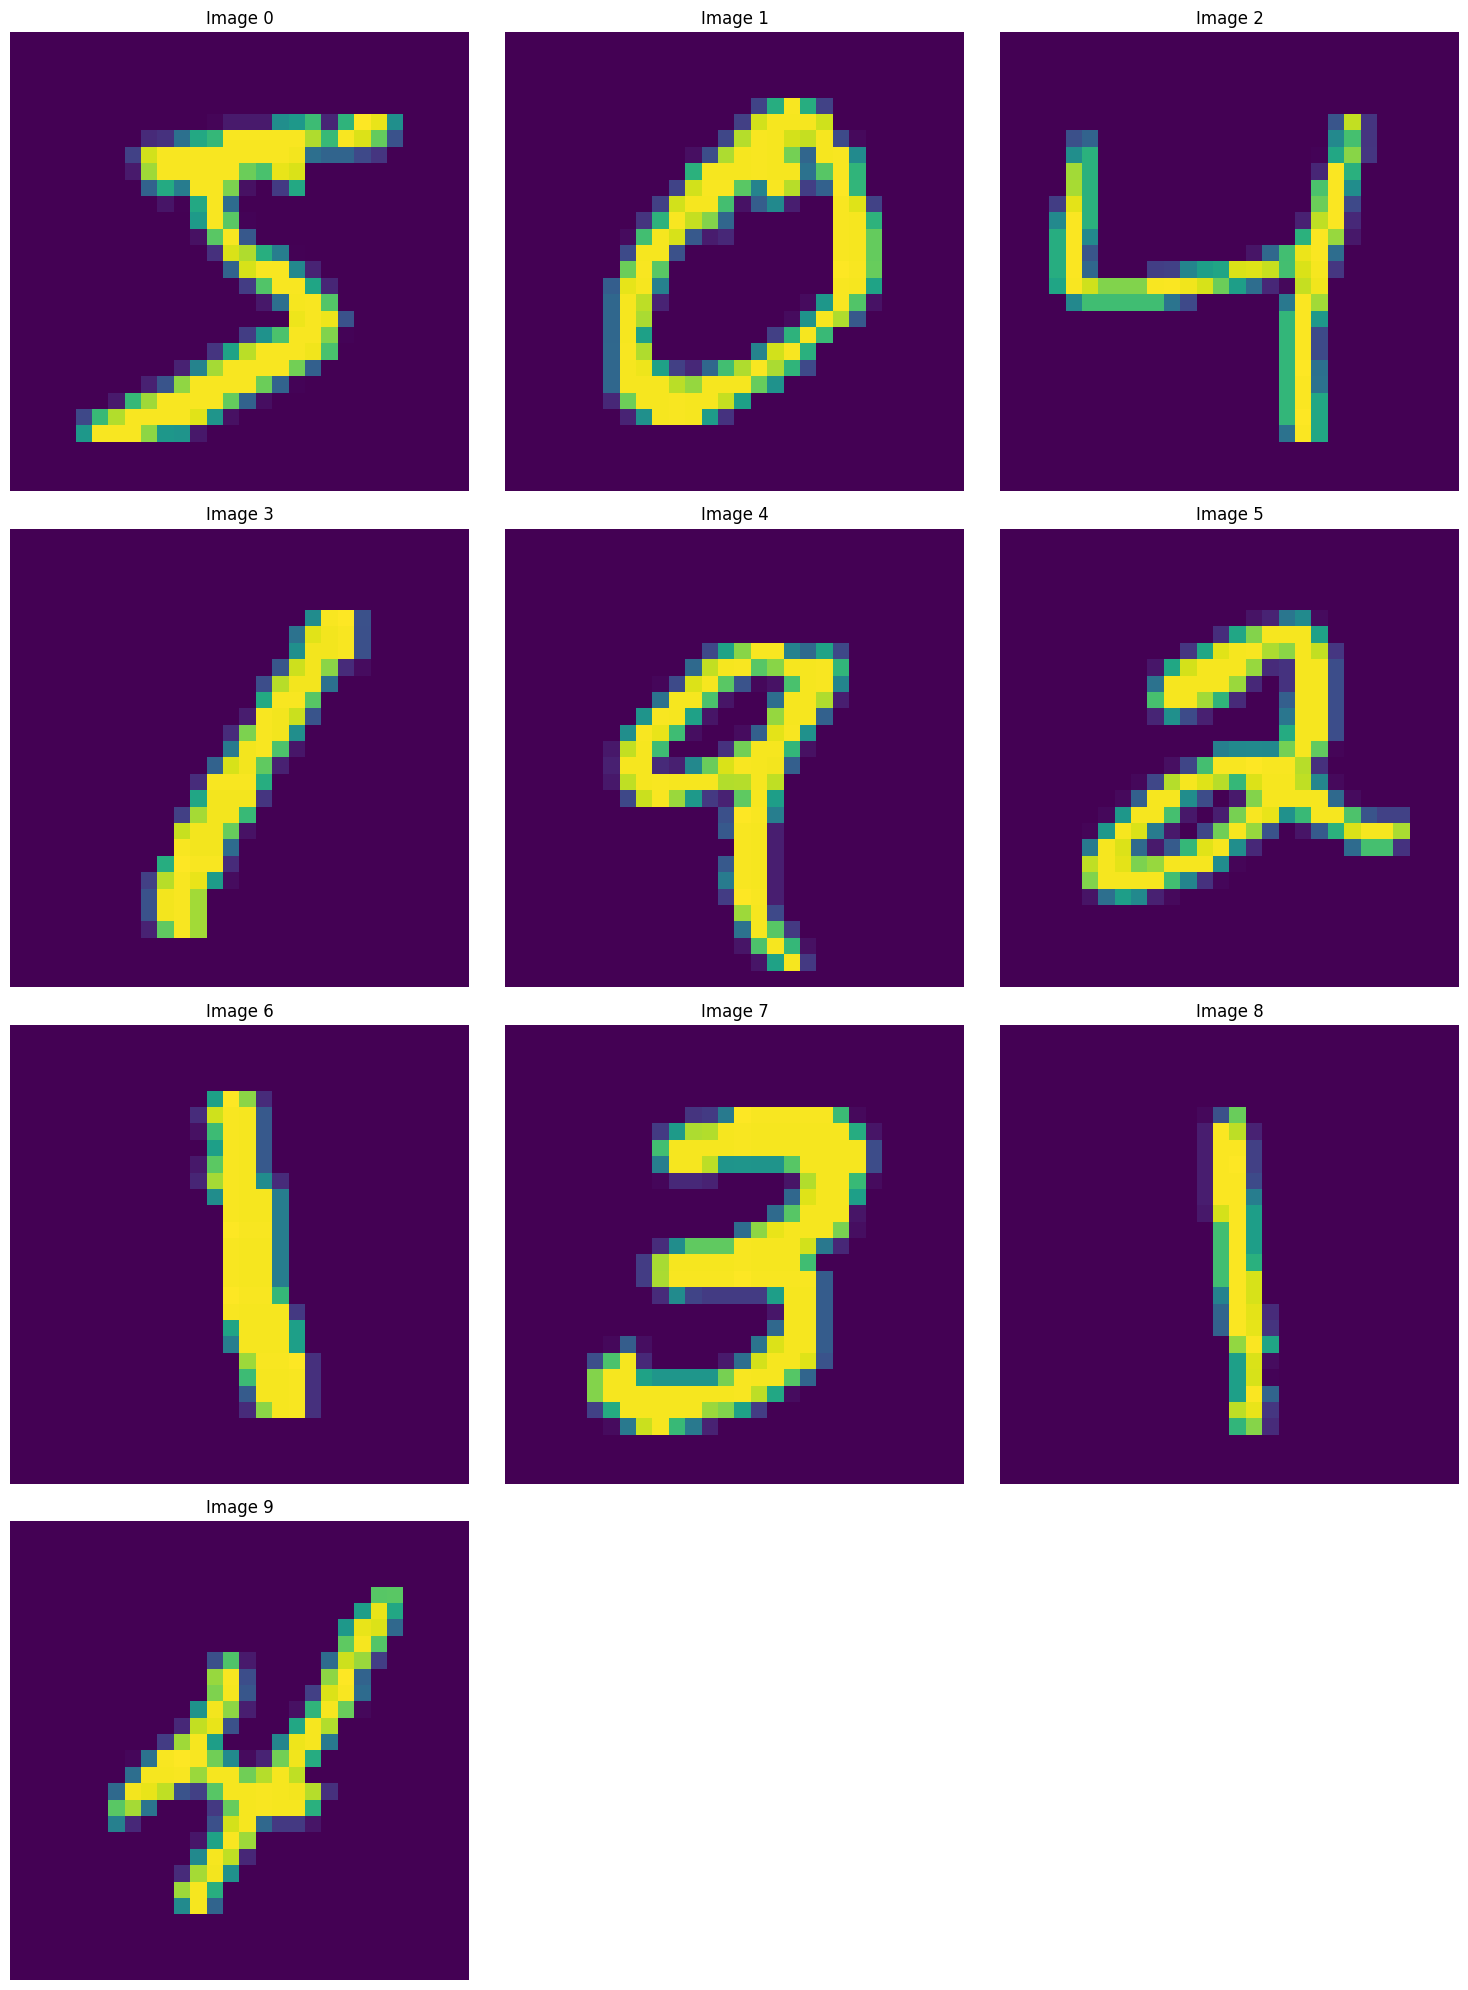

In [13]:
import matplotlib.pyplot as plt

# Total images to show
num_images = 10
images_per_row = 3
num_rows = (num_images + images_per_row - 1) // images_per_row  # Ceiling division

plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure size for clarity

for i in range(num_images):
    plt.subplot(num_rows, images_per_row, i + 1)
    plt.imshow(X_train[i])
    plt.title(f"Image {i}")
    plt.axis('off')  # Hide axes for cleaner look

plt.tight_layout()
plt.show()


In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1745497542.881950      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1745497542.882738      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [19]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25


I0000 00:00:1745497720.453881     105 service.cc:148] XLA service 0x7efe980079e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745497720.454712     105 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1745497720.454749     105 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1745497720.702716     105 cuda_dnn.cc:529] Loaded cuDNN version 90300


 121/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5803 - loss: 1.3976

I0000 00:00:1745497721.716478     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8585 - loss: 0.4914 - val_accuracy: 0.9531 - val_loss: 0.1589
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9633 - loss: 0.1287 - val_accuracy: 0.9659 - val_loss: 0.1171
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9729 - loss: 0.0904 - val_accuracy: 0.9678 - val_loss: 0.1050
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9804 - loss: 0.0631 - val_accuracy: 0.9682 - val_loss: 0.1061
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9856 - loss: 0.0460 - val_accuracy: 0.9724 - val_loss: 0.1026
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9889 - loss: 0.0358 - val_accuracy: 0.9756 - val_loss: 0.0923
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9908 - loss: 0.0290 - val_accuracy: 0.9700 - val_loss: 0.1090
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9909 - loss: 0.0260 - val_accurac

In [21]:
y_prob = model.predict(X_test)
y_prob

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[1.08446247e-24, 2.70708863e-20, 9.49458340e-14, ...,
        1.00000000e+00, 1.05885932e-18, 9.79783339e-16],
       [1.35552466e-21, 7.37154478e-15, 1.00000000e+00, ...,
        2.79974347e-26, 1.00448264e-19, 4.64515027e-40],
       [1.44042955e-11, 9.99998689e-01, 8.56307054e-07, ...,
        4.12276819e-07, 1.19284920e-07, 1.68457072e-13],
       ...,
       [2.23905343e-30, 2.21530710e-15, 1.02458739e-19, ...,
        9.80321628e-16, 3.11483634e-16, 6.58393560e-14],
       [4.46534513e-28, 7.10445127e-27, 6.01309097e-35, ...,
        7.68597593e-24, 2.81976898e-16, 5.72158349e-26],
       [3.14617887e-19, 3.45125067e-27, 2.13907707e-18, ...,
        1.18543559e-27, 3.15090235e-17, 5.41006106e-20]], dtype=float32)

In [23]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [25]:
from sklearn.metrics import accuracy_score
ret = accuracy_score(y_test,y_pred)
ret*100

97.26

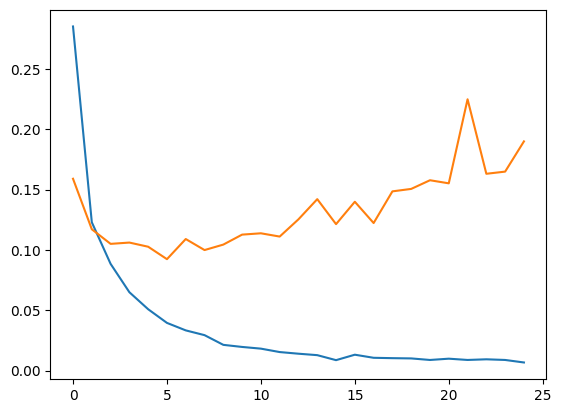

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

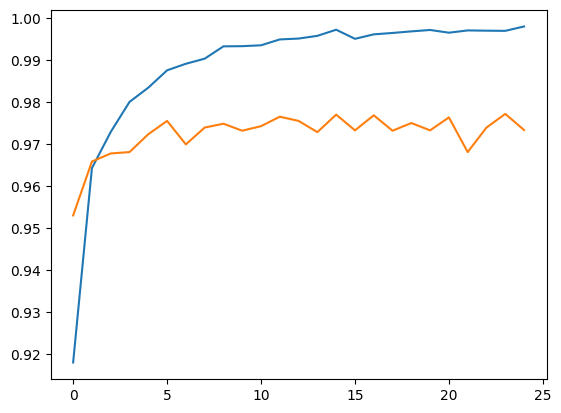

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# Now finally lets test the model if its working fine

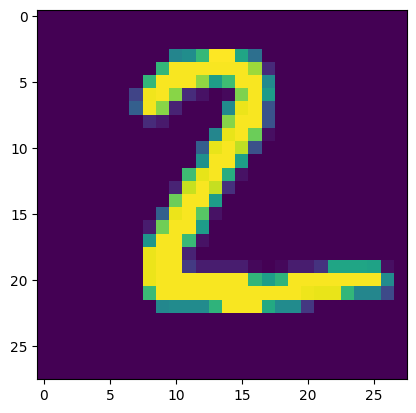

In [28]:
#1st test
plt.imshow(X_test[1])

In [29]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


array([2])

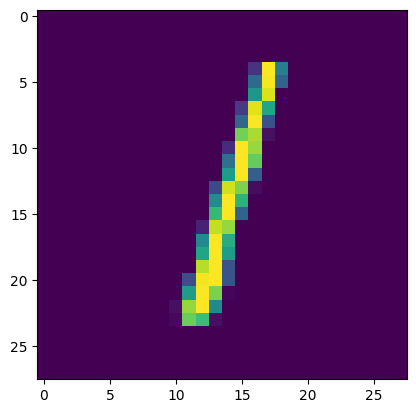

In [30]:
#2nd test
plt.imshow(X_test[2])

In [31]:
model.predict(X_test[2].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([1])

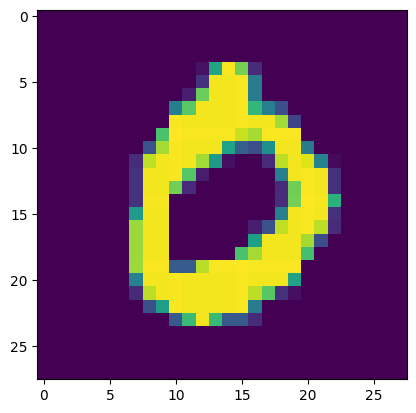

In [33]:
#3rd test
plt.imshow(X_test[3])


In [34]:
model.predict(X_test[3].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([0])

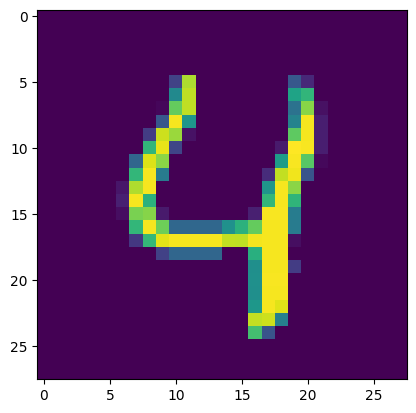

In [36]:
#4th test
plt.imshow(X_test[4])

In [37]:
model.predict(X_test[4].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([4])